# O problema de Dirichlet para a equação do calor. 
## Um exemplo de aproximação usando o método das linhas

Nesta notebook vamos ilustrar o desempenho do método das linhas na aproximação da solução do problema de Dirichlet homogêneo para a equação do calor, 

 \begin{align}
  \partial_t u&=k\partial_x^2u, \quad 0 < x < L, t>0;\\
  u(0,t)&=0,u(L,t)=0,\quad  t\geq 0;\\
  u(x,0)&=f(x),\quad 0 \leq x \leq  L.
 \end{align}

In [1]:
#NumPy é a principal biblioteca para cálculos científicos de Python. Ela disponibiliza o objeto multidimensional 
#arranjo, objetos derivados, e um conjuntos de rotinas para operações rápidas sobre arranjos.
import numpy as np
#Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python
import matplotlib.pyplot as plt
%matplotlib inline
#importar mplot3d: toolkit que contém a classe axes3d, com funções para plotar superfícies 
from mpl_toolkits import mplot3d
# Fonte a ser usada nas figuras geradas pela Matplotlib.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

## 1. Método das Linhas

Neste método, a solução do problema de Dirichlet homogêneo para a equação do calor é aproximada pela solução do 
sistema de EDOs
\begin{equation}
\mathbf{u}'(t) = \frac{k}{(\Delta x)^2}A_L\mathbf{u}(t), \quad \mathbf{u}(0) = \mathbf{u}_0, 
\end{equation}

onde
$$\mathbf{u}(t) = [u_1(t),u_2(t),\dots,u_{M-1}(t)]^t,\quad \mathbf{u}_0 = [f (x_1 ),\dots, f (x_{M−1})]^t,$$

\begin{equation}
 A_L=\begin{pmatrix}
-2 & 1 & 0 & 0 & \dots & 0 & 0 & 0\\
1& -2&1&0&\dots&0&0&0\\
0&1& -2&1&\dots&0&0&0\\
\vdots&\vdots &\vdots&\vdots&\dots&0&0&0\\
0&0&0&0&\dots&1&-2&1\\
0&0&0&0&\dots&0&1&-2
\end{pmatrix}
\end{equation}

de forma que $u(x_m,t) \approx u_m(t)$.

A solução do sistema é $$\mathbf{u}(t) = e^{\frac{k}{(\Delta x)^2} A_Lt} \mathbf{u}_0.$$ 

Os autovalores da matriz $A_L$ são $\displaystyle \lambda_m=-4\,\text{sen }^2\left(\frac{m\pi}{2M}\right),\quad 1 \leq m \leq M-1.$ 

Além disto, $V_m=\sqrt{\frac{2}{M}}[\text{sen } \theta_m,\text{sen } 2\theta_m,\text{sen } 3\theta_m,\dots,\text{sen } (M-1)\theta_m]^t$ é um autovetor associado ao autovalor $\lambda_m$. Aqui $\theta_m=\frac{m \pi}{M}$.

Os vetores $V_m$ formam um conjunto ortonormal, portanto, se chamarmos 
de $P=[V_1|V_2|\cdots|V_{M-1}]$ à matriz com colunas $V_j$, $P$ será ortogonal. Assim $P^{-1}=P^t$ e 
obtemos que
$$e^{\frac{k}{(\Delta x)^2}A_Lt} =P \begin{bmatrix}
                                      e^{\lambda_1\frac{k}{(\Delta x)^2}t} & 0 & \cdots &0\\
                                      0 & e^{\lambda_2 \frac{k}{(\Delta x)^2}t} &  \cdots &0\\
                                      \vdots \\
                                      0 & 0 &  \cdots &e^{\lambda_{M-1} \frac{k}{(\Delta x)^2}t}
                                      \end{bmatrix}P^t .$$
### 1.1 Implementação                                      

In [2]:
def u_mlinhas(k, L, M, T, N, f):
    """
    Executa o MOL para o problema de Dirichlet homogêneo para a eq. calor.
    
    Parâmetros
    ----------
    k: float
    coeficiente de difusividade térmica
    L: float
    comprimento da barra
    M: integer
    quantidade de intervalos na partição do intervalo [0,L]
    T: float
    [0,T]: intervalo onde será aplicado o MOL
    N: integer
    Quantidade de intervalos de tempo para plotar a solução
    f: function
    perfil inicial de temperatura
    
    Retorna
    -------
    mol_calor: numpy array (M+1) x (N+1)
    mol_calor[:,t_j] = valores do MOL em cada t_j = j*T/N
    """

    mol_calor = np.zeros((M+1,N+1))
    
    #Discretização na horizontal
    dx = L / M # Tamanho do passo no espaço
    malha_x = np.linspace(0.0, L, num=M + 1)# Malha horizontal com M+1 pontos
    
    #Condição inicial discretizada
    mol_calor[:,0] = f(malha_x)
    
    #Discretização na vertical para visualizar
    malha_t = np.linspace(0.0, T, num=N + 1)

    #Arranjo de autovalores
    theta = np.array([m*np.pi/M for m in range(1,M)], dtype=float)
    l_autovalores = -4*(np.sin(theta/2))**2

     #Arranjo de autovetores
    P = np.array([np.sqrt(2/M)*np.sin(j*theta) for j in range(1,M)], dtype=float)

    #Método das linhas
    for j in range(1,N+1):
        t = j*T/N
        exponencial_t = np.dot(np.dot(P,np.diag(np.exp((t*k/(dx)**2)*l_autovalores))),P.transpose())
        produto = np.dot(exponencial_t,mol_calor[1:-1,0])  
        #colocar um zero no inicio e outro no final para satisfazer C.F.
        mol_calor[:,j] = np.insert(np.insert(produto, 0, 0), M, 0)
    return mol_calor

## 2. Exemplo 

Consideraremos como perfil inicial de temperatura $$f(x) = \text{sen } \left(\frac{n\pi}{L} x\right)$$. Nesse caso podemos calcular uma fórmula explícita para a solução $$u(x,t) = e^{-k \left(\frac{n\pi}{L}\right)^2t}\text{sen } \left(\frac{n\pi}{L} x\right)$$

Fixaremos os valores $k=L=1$ e $n=1$. 

In [3]:
#Valores das constantes do problema
k = 1
L = 1
n = 1
# função que implementa o perfil inicial de temperatura
def f1(x):
    return np.sin(n*np.pi*x/L)
# fórmula da solução 
def u_exata(x,t):
    return np.exp(-(k*(n*np.pi/L)**2)*t)*np.sin((n*np.pi/L)*x) 

### 2.1 Visualização da condição inicial e das condições de fronteira

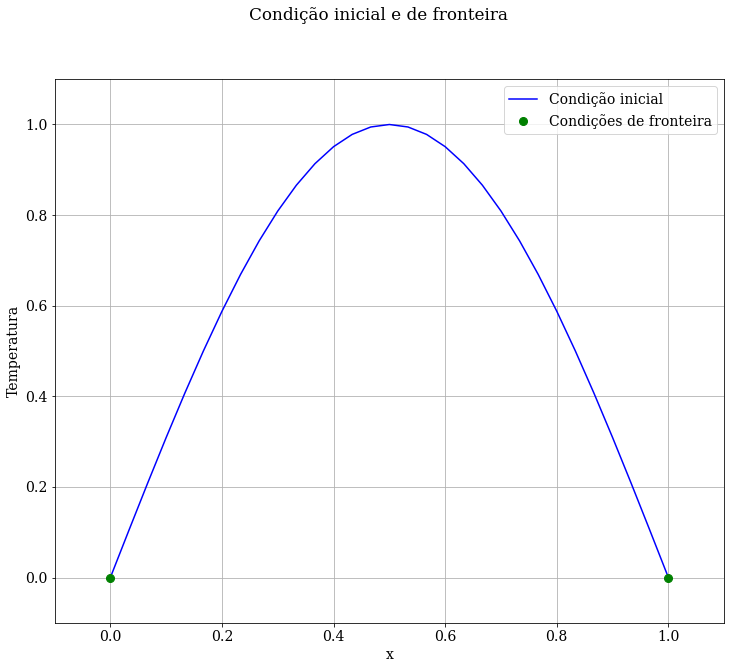

In [4]:
# Quantidade de subintervalos na malha horizontal
M = 30 
#Malha no intervalo [0,L]
malha_x = np.linspace(0.0, L, num=M + 1)# Malha horizontal com M+1 pontos
# Tamanho da figura e janelas
figsize = (12, 10)
colunas = 1
linhas = 1
fig, axs = plt.subplots(linhas, colunas, figsize=figsize)
fig.suptitle('Condição inicial e de fronteira')
axs.set_ylabel('Temperatura')
axs.set_xlabel('x')
axs.set_xlim((-0.1,1.1))
axs.set_ylim((-0.1,1.1))
axs.plot(malha_x,f1(malha_x),'-',label='Condição inicial',color = 'blue')
axs.plot([0,1],[0,0],'go',label='Condições de fronteira',color = 'green', markersize=8)
axs.grid(True)
axs.legend(loc='best');

### 2.2 Visualização do método das linhas

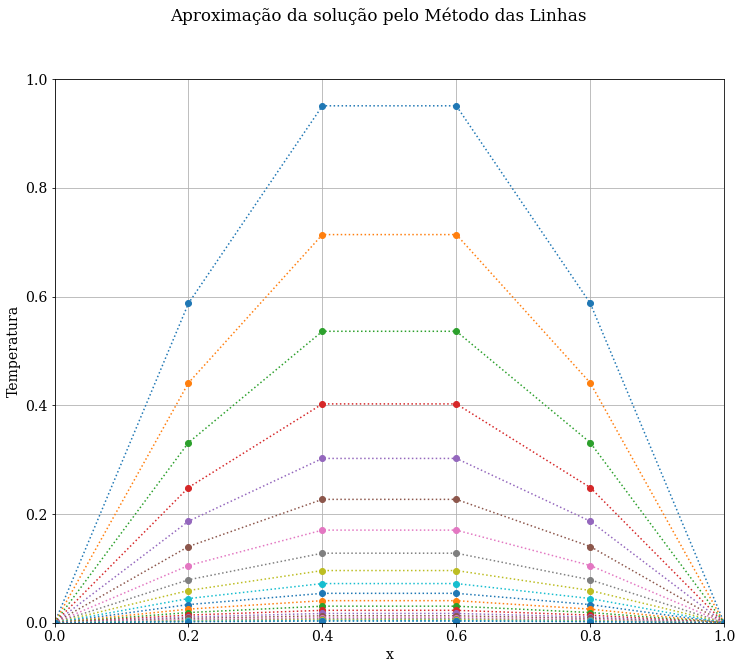

In [5]:
#Malha no tempo
T=0.6
N=20
malha_t = np.linspace(0.0, T, num=N + 1)
# Quantidade de subintervalos na malha horizontal
M = 5 
#Malha no intervalo [0,L]
malha_x = np.linspace(0.0, L, num=M + 1)# Malha horizontal com M+1 pontos
# Tamanho da figura e janelas
figsize = (12, 10)
colunas = 1
linhas = 1
fig, axs = plt.subplots(linhas, colunas, figsize=figsize)
fig.suptitle('Aproximação da solução pelo Método das Linhas')
axs.set_ylabel('Temperatura')
axs.set_xlabel('x')
axs.set_xlim((0,1))
axs.set_ylim((0,L))
sol_MOL = u_mlinhas(k, L, M, T, N, f1)
for j in range(N+1):
    axs.plot(malha_x, sol_MOL[:,j], 'o:')
axs.grid(True);
#plt.legend();

### 2.3 Visualização da solução exata e de sua aproximação pelo método das linhas

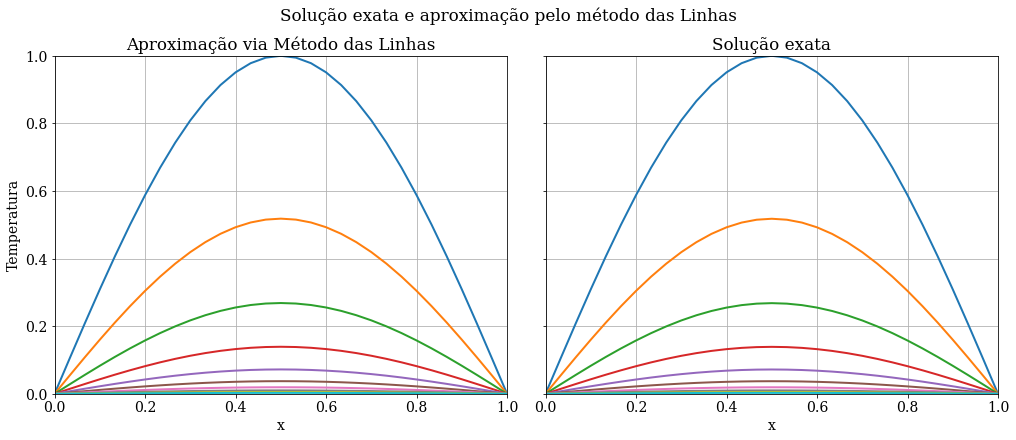

In [6]:
# Plotar a solução
#Malha no tempo
T=0.6
N=9
malha_t = np.linspace(0.0, T, num=N + 1)
# Quantidade de subintervalos na malha horizontal
M = 30 
#Malha no intervalo [0,L]
malha_x = np.linspace(0.0, L, num=M + 1)# Malha horizontal com M+1 pontos
# Plotagem da solução exata junto com as aproximações obtidas.
# Tamanho da figura e janelas
figsize = (14, 6)
colunas = 2
linhas = 1
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True,sharey=True)
fig.suptitle('Solução exata e aproximação pelo método das Linhas')
axs[0].set_ylabel('Temperatura')
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[0].set_title('Aproximação via Método das Linhas')
axs[1].set_title('Solução exata')
axs[0].set_xlim((0,L))
axs[1].set_xlim((0,L))
axs[0].set_ylim((0,1))
axs[1].set_ylim((0,1))
sol_MOL = u_mlinhas(k, L, M, T, N, f1)
for j in range(N+1):
    axs[0].plot(malha_x, sol_MOL[:,j], linestyle='-', linewidth=2)
    axs[1].plot(malha_x, u_exata(malha_x,j*T/N), linestyle='-', linewidth=2)
axs[0].grid(True)
axs[1].grid(True);
#plt.legend();
    

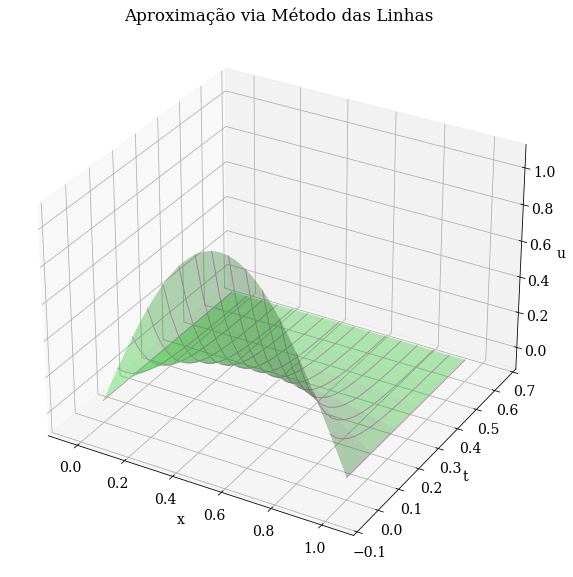

In [7]:
# Plotar a solução
#Malha no tempo
T=0.6
N=20
malha_t = np.linspace(0.0, T, num=N + 1)
# Malha horizontal
M = 15 
malha_x = np.linspace(0.0, L, num=M + 1)# Malha horizontal com M+1 pontos
#Método das linhas
sol_MOL = u_mlinhas(k, L, M, T, N, f1) #Aproximação MOL
#Malhas refinada para a superfície
malhaRefinada_x = np.linspace(0.0, L, num=60)# Malha horizontal com M+1 pontos
#Malha2D
x_malha_refinada,Tempo_ref = np.meshgrid(malhaRefinada_x, malha_t)

#Plotar a superfície e as linhas sobre ela
fig3D = plt.figure(figsize=(10,10)) #definir figura
ax3D = plt.axes(projection ='3d')# O argumento projection='3d' cria `ax3D` como uma instância da classe axes3d 

#superfície da solução exata
ax3D.plot_surface(x_malha_refinada, Tempo_ref, u_exata(x_malha_refinada,Tempo_ref),\
                  rstride=4, cstride=4, linewidth=0, alpha=0.3, color = 'lime')
#curvas do MOL
for j in range(M+1):
    ax3D.plot3D(malha_x[j]*np.ones(N+1), malha_t, sol_MOL[j,:], '-', color = 'violet', linewidth=1)



#limites em x, t e u
ax3D.set_xlim3d(-0.1, L+0.1);
ax3D.set_ylim3d(-0.1, T+0.1);
ax3D.set_zlim3d(-0.1, 1.1)
              
#título e nomes dos eixos    
ax3D.set_ylabel('t')
ax3D.set_xlabel('x')
ax3D.set_zlabel('u')
ax3D.set_title('Aproximação via Método das Linhas')

plt.show();